In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # To add a comma separator to 4 digit numbers
import statistics #enable calculation of mean in histogram charts
import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
# reading data from csv file
df = pd.read_csv('C:/Users/David/Downloads/car_prices_data.csv')
#display first 5 rows
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
#display last 5 rows
df.tail(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [4]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
#checking the number of rows and columns in a dataset
df.shape

(558837, 16)

In [6]:
# statistical summary of the features in the dataset
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
#checking for nulls in the dataset
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
# display car brands in the dataset
brand = df['make'].unique()
brand

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [9]:
# display body types of cars in the dataset
body_types = df['body'].value_counts()
body_types

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [10]:
# checking values of the condition column
condition = sorted(df['condition'].unique())
condition

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 48.0,
 nan,
 46.0,
 47.0,
 49.0]

In [11]:
#nissan = df[df['make']==''

# Data Cleaning

After exploring the data, I found out the following issues that needs  to be resolved:
- In the make and body column there were some names which were considererd differebt because of letter casing eg bmw and BMW
- The condition column was suppossed to have a rating from 1.0 to 5.0 but it seems like the point was misplaced causing values like 11.0 to appear instead of 1.1 and 49.0 instead of 4.9.
- The saledate column had an object data type and I will be changed to date time
- The following numeric columns had missing values
     - mmr
     - selling price
     - condition
     - odometer

In [14]:
# converting the make and body column to proper case
df['make'] = df['make'].str.title()
df['body'] = df['body'].str.title()
brand = df['make'].unique()
brand

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', nan, 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Landrover', 'Mercedes',
       'Gmc Truck', 'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge Tk',
       'Geo', 'Rolls-Royce', 'Mazda Tk', 'Hyundai Tk', 'Mercedes-B', 'Vw',
       'Daewoo', 'Chev Truck', 'Ford Tk', 'Plymouth', 'Ford Truck',
       'Tesla', 'Airstream', 'Dot', 'Aston Martin', 'Fisker',
       'Lamborghini', 'Lotus'], dtype=object)

In [15]:
# replacing 'Volkswagem' with 'Vw' to make it 1
df['make'] = df['make'].replace({'Volkswagen':'Vw','Mercedes-B':'Mercedes-Benz','Landrover':'Land Rover',
                                'Mercedes':'Mercedes-Benz','Ford Truck':'Ford Tk','Hyundai Tk':'Hyundai',
                                'Dodge Tk':'Dodge','Mazda Tk':'Mazda','Chev Truck':'Chevrolet','Ford Tk':'Ford','Gmc Truck':'Gmc'})

In [16]:
#Standardizing body types
body = df['body'].unique()
body

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'Crewmax Cab', 'Access Cab',
       'King Cab', 'Supercrew', 'Cts Coupe', 'Extended Cab',
       'E-Series Van', 'Supercab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'Cts-V Coupe', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'Cts Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Cab Plus', 'Beetle Convertible',
       'Tsx Sport Wagon', 'Promaster Cargo Van',
       'Granturismo Convertible', 'Cts-V Wagon', 'Ram Van', 'Transit Van',
       'Navitgation', 'Regular-Cab'], dtype=object)

In [17]:
coupes = ['Q60 Coupe','Cts Coupe','G37 Coupe','G Coupe', 'Cts-V Coupe' , 'Genesis Coupe','Elantra Coupe', 'Koup']
convertibles = ['G Convertible','G37 Convertible', 'Q60 Convertible', 'Beetle Convertible', 'Granturismo Convertible']
wagon = ['Cts-V Wagon','Cts Wagon','Tsx Sport Wagon']
df['body'] = df['body'].replace(coupes,'Coupe')
df['body'] = df['body'].replace(convertibles,'Convertible')
df['body'] = df['body'].replace(wagon,'Wagon')
df['body'] = df['body'].replace({'G Sedan':'Sedan','Ram Van':'Van','Supercrew':'Crew Cab','Crewmax Cab':'Crew Cab',
                                 'Transit Van':'Van','Promaster Cargo Van':'Van','E-Series Van':'Van','Regular-Cab':'Regular Cab',
                                'Supercab':'King Cab','Club Cab':'King Cab','Extended Cab':'King Cab','Access Cab':'Regular Cab',
                                'Cab Plus 4':'Cab Plus'})
df['body'].unique()

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'Minivan', nan, 'Van', 'Double Cab', 'Regular Cab',
       'King Cab', 'Quad Cab', 'Xtracab', 'Mega Cab', 'Cab Plus',
       'Navitgation'], dtype=object)

In [18]:
countmakes = df['make'].value_counts()
countmakes

make
Ford             93998
Chevrolet        60588
Nissan           54017
Toyota           39966
Dodge            30956
Honda            27351
Hyundai          21837
Bmw              20793
Kia              18084
Chrysler         17485
Mercedes-Benz    17213
Jeep             15483
Infiniti         15305
Vw               12629
Lexus            11980
Gmc              10649
Mazda             8509
Cadillac          7629
Acura             5926
Audi              5877
Lincoln           5786
Buick             5121
Subaru            5103
Ram               4574
Pontiac           4524
Mitsubishi        4257
Volvo             3788
Mini              3224
Saturn            2841
Mercury           2023
Land Rover        1891
Scion             1687
Jaguar            1420
Porsche           1402
Suzuki            1078
Fiat               865
Hummer             805
Saab               484
Smart              396
Oldsmobile         384
Isuzu              204
Maserati           136
Bentley            116
Plymou

### Correcting values of the condition column
I will identify values in the column which are > 5.0 and divide them by 10 to change the position of the decimal point.

In [20]:
df['condition'] = df['condition'].apply(lambda x: x/10 if x > 5 else x)
# checking if the values are fixed
check_condition = sorted(df['condition'].unique())
check_condition

[1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 nan,
 4.9]

### Converting the data type of saledate column from object to datetime

There are 12 rows with null values in the date column. We weill drop these values so that they will not cause errors when converting the data type of the saledate column to datetime

In [23]:
# dropping nul values in the saledate column 
df = df.dropna(subset=['saledate'])
# converting the data type
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
print(df['saledate'].dtype)

datetime64[ns, UTC]


## Handling missing values

In [25]:
#checking for nulls in the dataset
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                26
sellingprice        0
saledate           26
dtype: int64

#### Since we are sure that the condition column has no outliers, I will replace the missing values with mean of the condition column

In [27]:
# filling missing values with mean
df['condition'] = df['condition'].fillna(df['condition'].mean())
#checking if there are nulls left
df['condition'].isnull().sum()

0

#### To handle missing values from the odometer column we will use median because there is skewed data so meadian is a better replacement of the null values as it represents the center of ordinal data

In [29]:
# replacing odometer null values with median
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
#checking if there are nulls left
df['condition'].isnull().sum()

0

In [30]:
# replacing mmr null values with mean
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())
#checking if there are nulls left
df['mmr'].isnull().sum()

0

In [31]:
#checking for nulls in the dataset
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           26
dtype: int64

### For rows with nulls for the following columns will be dropped:
- make
- model
- trim
- vin

#### To handle missing values in the transmission column, I will replace them using the most common transmission type

In [34]:
# replacing missing values from transmission with mode
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
#checking if there are nulls left
df['transmission'].isnull().sum()

0

In [35]:
# checking transmission types 
df['transmission'].value_counts()

transmission
automatic    541255
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [36]:
# checking the rows with the misplaced transmission values
df[df['transmission']=='sedan']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,3.424534,2.0,6864,gray,black,13769.377495,14000.0,NaT
497008,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm273601,3.424534,28.0,339,black,black,13769.377495,14300.0,NaT
497011,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm221322,3.424534,48.0,18384,silver,black,13769.377495,13550.0,NaT
499083,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm268964,3.424534,2.0,9887,red,black,13769.377495,13900.0,NaT
501455,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj6fm231972,3.424534,38.0,9837,red,black,13769.377495,13500.0,NaT
505299,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj7fm222388,3.424534,36.0,20379,silver,black,13769.377495,13600.0,NaT
505306,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj7fm218440,3.424534,42.0,20627,white,black,13769.377495,13600.0,NaT
520461,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17ajxfm315938,3.424534,1.0,721,blue,gray,13769.377495,14100.0,NaT
528996,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj7fm229552,3.424534,38.0,6158,black,black,13769.377495,13650.0,NaT
529009,2015,Vw,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj8fm298895,3.424534,2.0,2817,red,black,13769.377495,13750.0,NaT


In [37]:
df = df.drop(df[df['body']=='Navitgation'].index)

In [38]:
# overwriting the misplaced values in the transmission column
df.loc[df['transmission']=='Sedan','body'] = df['transmission']
df.loc[df['transmission']=='sedan','transmission'] = df['vin']
# checking transmission types 
df['transmission'].value_counts()

transmission
automatic    541255
manual        17544
Name: count, dtype: int64

In [39]:
df['transmission'].value_counts()

transmission
automatic    541255
manual        17544
Name: count, dtype: int64

In [40]:
# overwriting the misplaced values in the transmission column
df.loc[df['transmission']=='Sedan','transmission'] = df['vin']
# checking transmission types 
df['transmission'].value_counts()

transmission
automatic    541255
manual        17544
Name: count, dtype: int64

#### - In the above result we can now see that transmission in now clean with only 2 categories 

In [43]:
df['color'].value_counts()

color
black        110969
white        106670
silver        83385
gray          82854
blue          51138
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

#### The above output shows that there are colors with numeric values and that will be fixed in this cleaning phase

In [45]:
df['vin'].value_counts()

vin
wbanv13588cz57827    5
1ftfw1cv5afb30053    4
wp0ca2988xu629622    4
5n1ar1nn2bc632869    4
wddgf56x78f009940    4
                    ..
1g2wj52j4yf252650    1
4t1bf22k8yu947241    1
1nxbr12e4yz340510    1
jn1ca31d3yt525547    1
1ftfw1et2eke87277    1
Name: count, Length: 550284, dtype: int64

In [46]:
# checking the rows with the misplaced transmission values
df[df['vin']=='automatic']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [47]:
#
df[df['body']=='Navitgation']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


#### After checking the cars with 'Navitgation' body type I realised that the values in the seller column are colors which are supposed to be in the color column

In [49]:
# overwriting the misplaced values in the color column
df.loc[df['body']=='Navitgation','color'] = df['seller']
df[df['body']=='Navitgation']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [50]:
# Find colors with a total count of 1
df[df['color'].isin(df['color'].value_counts()[lambda x: x == 1].index)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [51]:
# updating the color values of the above result
df.loc[df['color'].isin(df['color'].value_counts()[lambda x: x == 1].index),'color']= df['seller']
# showing the changes
df['color'].value_counts()

color
black        110969
white        106670
silver        83385
gray          82854
blue          51138
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

In [146]:
# filling up missing values for rows with color _
df[(df['color'] == '—') & (df['interior'] == 'black')]
df.loc[(df['color'] == '—') & (df['interior'] == 'black'), 'color'] = 'black'
df.loc[(df['color'] == '—') & (df['interior'] == 'beige'), 'color'] = 'white'
df.loc[(df['color'] == '—') & (df['interior'] == 'gray'), 'color'] = 'white'
df.loc[(df['color'] == '—') & (df['interior'] == 'tan'), 'color'] = 'white'
df[df['color'] == '—'] = 'black'

In [52]:
#checking the values of the state column
df['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23478
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12025
md    11157
wi     9851
mn     9429
az     8740
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [53]:
#looking up values with count of 1
df[df['state'].isin(df['state'].value_counts()[lambda x: x == 1].index)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


####  From the above result we can note that the values which are supposed to be in the 'vin' column are in the state column and will fix that below

In [55]:
# updating the color values of the above result
df.loc[df['state'].isin(df['state'].value_counts()[lambda x: x == 1].index),'state']= df['state'].mode()[0]
df['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23478
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12025
md    11157
wi     9851
mn     9429
az     8740
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [56]:
#writing full state names for easier identification
df['state'] = df['state'].replace({
    'fl': 'Florida', 'ca': 'California', 'pa': 'Pennsylvania', 'tx': 'Texas',
    'ga': 'Georgia', 'nj': 'New Jersey', 'il': 'Illinois', 'nc': 'North Carolina',
    'oh': 'Ohio', 'tn': 'Tennessee', 'mo': 'Missouri', 'mi': 'Michigan',
    'nv': 'Nevada', 'va': 'Virginia', 'md': 'Maryland', 'wi': 'Wisconsin',
    'mn': 'Minnesota', 'az': 'Arizona', 'co': 'Colorado', 'wa': 'Washington',
    'ma': 'Massachusetts', 'ny': 'New York', 'in': 'Indiana', 'sc': 'South Carolina',
    'ne': 'Nebraska', 'on': 'Ontario', 'pr': 'Puerto Rico', 'la': 'Louisiana',
    'ms': 'Mississippi', 'ut': 'Utah', 'qc': 'Quebec', 'hi': 'Hawaii',
    'or': 'Oregon', 'ab': 'Alberta', 'nm': 'New Mexico', 'ok': 'Oklahoma',
    'ns': 'Nova Scotia', 'al': 'Alabama'
})
df['state'].value_counts()

state
Florida           82945
California        73148
Pennsylvania      53907
Texas             45913
Georgia           34750
New Jersey        27784
Illinois          23478
North Carolina    21845
Ohio              21575
Tennessee         20895
Missouri          16013
Michigan          15511
Nevada            12685
Virginia          12025
Maryland          11157
Wisconsin          9851
Minnesota          9429
Arizona            8740
Colorado           7775
Washington         7416
Massachusetts      6729
New York           5699
Indiana            4325
South Carolina     4251
Nebraska           4013
Ontario            3442
Puerto Rico        2725
Louisiana          2191
Mississippi        1851
Utah               1836
Quebec             1245
Hawaii             1237
Oregon             1155
Alberta             928
New Mexico          171
Oklahoma             72
Nova Scotia          61
Alabama              26
Name: count, dtype: int64

#### Indentifying Outliers Using IQR Technique

I will identify outliers in the following columns:
- sellingprice
- mmr
- odometer

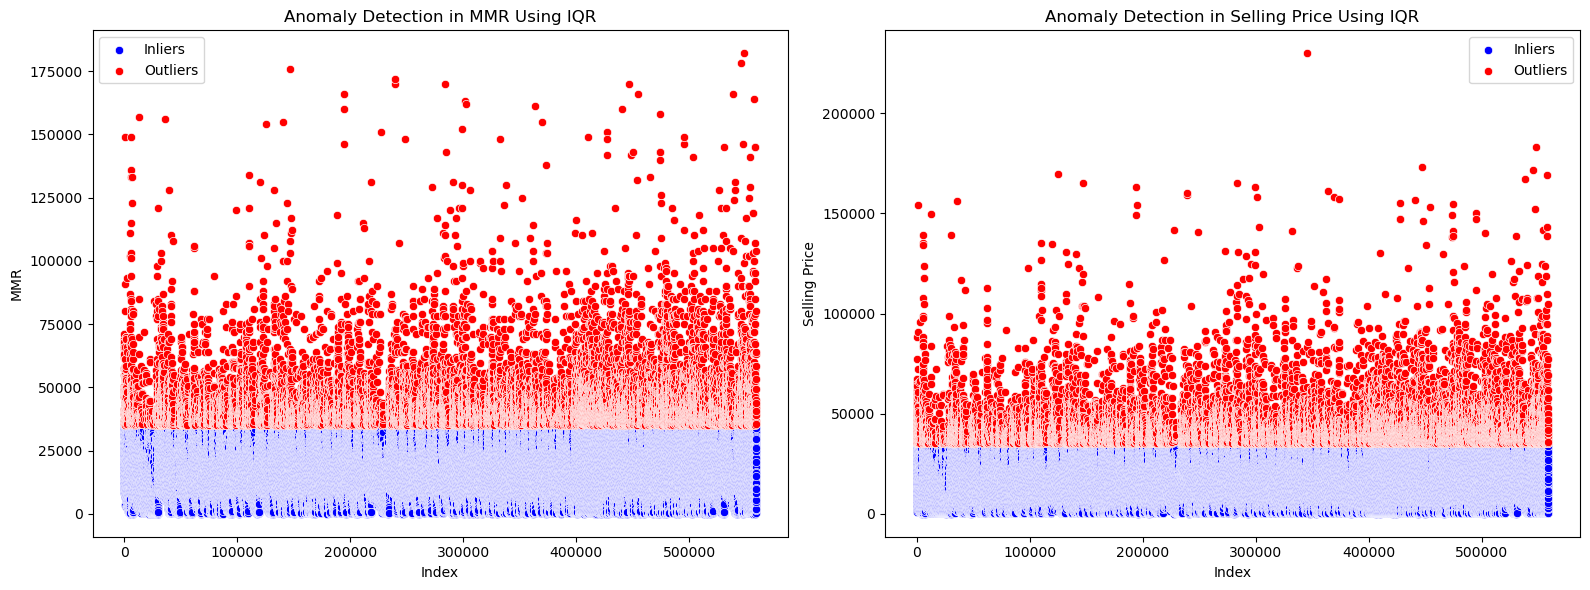

In [59]:
#function to calculate IQR limits and label anomalies
def iqr_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f'{column}_anomaly'] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), 1, 0)
    return df
#apply IQR technique for both 'mmr' and 'sellingprice'
df = iqr_outliers(df, 'mmr')
df = iqr_outliers(df, 'sellingprice')
#separate inliers and outliers for each column
inliers_mmr = df[df['mmr_anomaly'] == 0]
outliers_mmr = df[df['mmr_anomaly'] == 1]
inliers_sellingprice = df[df['sellingprice_anomaly'] == 0]
outliers_sellingprice = df[df['sellingprice_anomaly'] == 1]

#subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#scatter plot for MMR
sns.scatterplot(data=inliers_mmr, x=inliers_mmr.index, y='mmr', color='blue', label='Inliers', ax=axes[0])
sns.scatterplot(data=outliers_mmr, x=outliers_mmr.index, y='mmr', color='red', label='Outliers', ax=axes[0])
axes[0].set_title('Anomaly Detection in MMR Using IQR')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('MMR')
#scatter plot for Selling Price
sns.scatterplot(data=inliers_sellingprice, x=inliers_sellingprice.index, y='sellingprice', color='blue', label='Inliers', ax=axes[1])
sns.scatterplot(data=outliers_sellingprice, x=outliers_sellingprice.index, y='sellingprice', color='red', label='Outliers', ax=axes[1])
axes[1].set_title('Anomaly Detection in Selling Price Using IQR')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Selling Price')
# Show the plots side-by-side
plt.tight_layout()
plt.show()

The above result shows there are many outliers above the max value. I will replace the outliers outside the Q1 and Q3 range

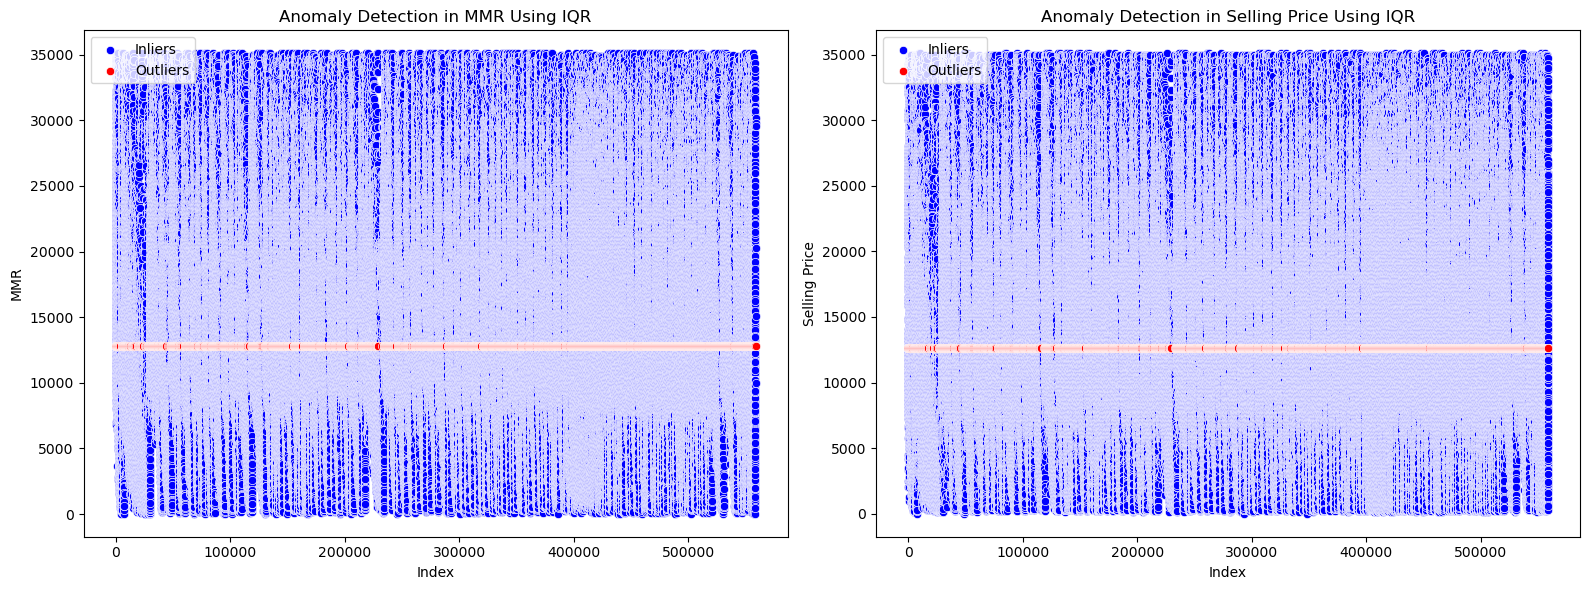

In [61]:
# Calculate mean of inliers for each column
meanMmr = df[df['mmr_anomaly'] == 0]['mmr'].mean()
meanSellingprice = df[df['sellingprice_anomaly'] == 0]['sellingprice'].mean()

# Replace outliers in each column with the mean of inliers
df['mmr'] = np.where(df['mmr_anomaly'] == 1, meanMmr, df['mmr'])
df['sellingprice'] = np.where(df['sellingprice_anomaly'] == 1, meanSellingprice, df['sellingprice'])

# Plot the data after replacing outliers
# Separate inliers and outliers for each column
inliers_mmr = df[df['mmr_anomaly'] == 0]
outliers_mmr = df[df['mmr_anomaly'] == 1]
inliers_sellingprice = df[df['sellingprice_anomaly'] == 0]
outliers_sellingprice = df[df['sellingprice_anomaly'] == 1]

# Subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for MMR
sns.scatterplot(data=inliers_mmr, x=inliers_mmr.index, y='mmr', color='blue', label='Inliers', ax=axes[0])
sns.scatterplot(data=outliers_mmr, x=outliers_mmr.index, y='mmr', color='red', label='Outliers', ax=axes[0])
axes[0].set_title('Anomaly Detection in MMR Using IQR')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('MMR')

# Scatter plot for Selling Price
sns.scatterplot(data=inliers_sellingprice, x=inliers_sellingprice.index, y='sellingprice', color='blue', label='Inliers', ax=axes[1])
sns.scatterplot(data=outliers_sellingprice, x=outliers_sellingprice.index, y='sellingprice', color='red', label='Outliers', ax=axes[1])
axes[1].set_title('Anomaly Detection in Selling Price Using IQR')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Selling Price')

# Show the plots side-by-side
plt.tight_layout()
plt.show()

# Visualisations

### Popular Make

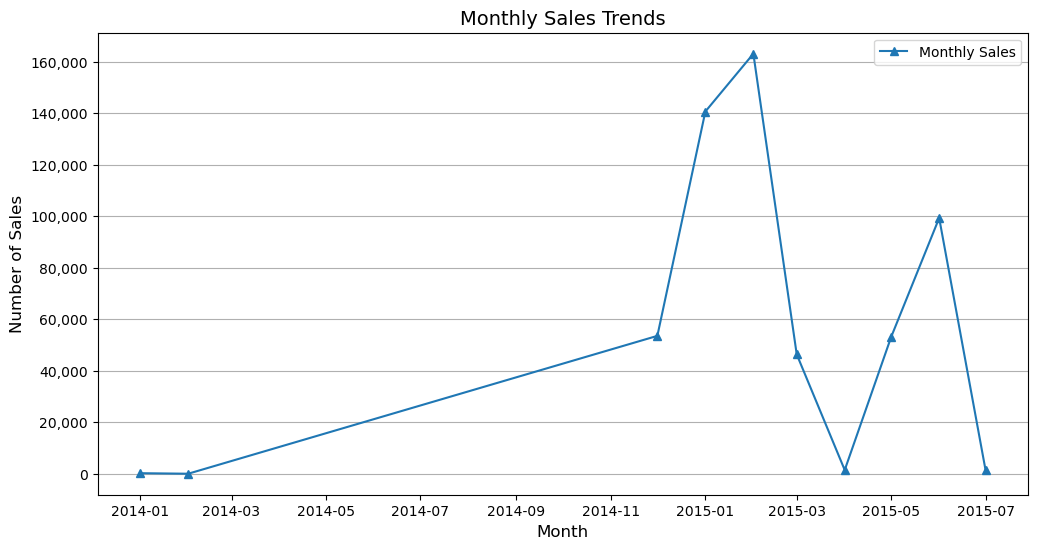

In [64]:
# Extracting year and month from the saledate column
df['month'] = df['saledate'].dt.month
df['year'] = df['saledate'].dt.year
# Grouping by year and month, counting the sales
monthlysales = df.groupby(['year', 'month']).size().reset_index(name='count')
monthlysales['date'] = pd.to_datetime(monthlysales[['year', 'month']].assign(day=1))
# Sorting by date
monthlysales = monthlysales.sort_values('date')
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.plot(monthlysales['date'], monthlysales['count'], marker='^', label='Monthly Sales')
plt.title("Monthly Sales Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.grid(axis='y')
plt.legend()
plt.show()

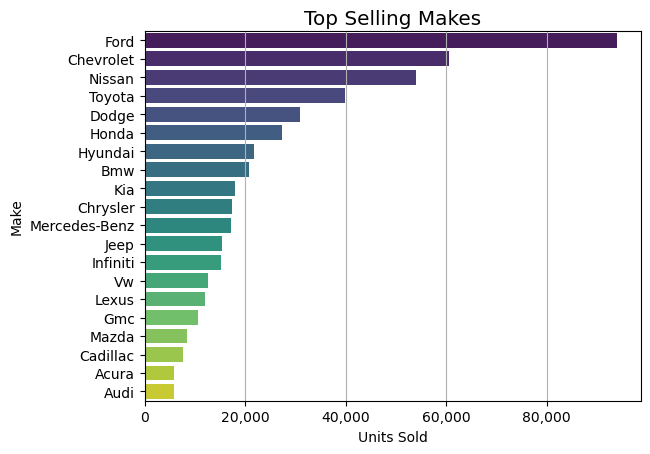

In [65]:
#Top 10 best selling make
top_20_makes = df['make'].value_counts().nlargest(20).index
#filtering the dataframe to include only top 20
filterd = df[df['make'].isin(top_20_makes)]

sns.countplot(y='make',data=filterd,order=top_20_makes,palette="viridis")
# Format the x-axis with commas
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.style.use('classic')
#labels
plt.title("Top Selling Makes")
plt.xlabel("Units Sold")
plt.ylabel("Make")
plt.grid(axis='x')

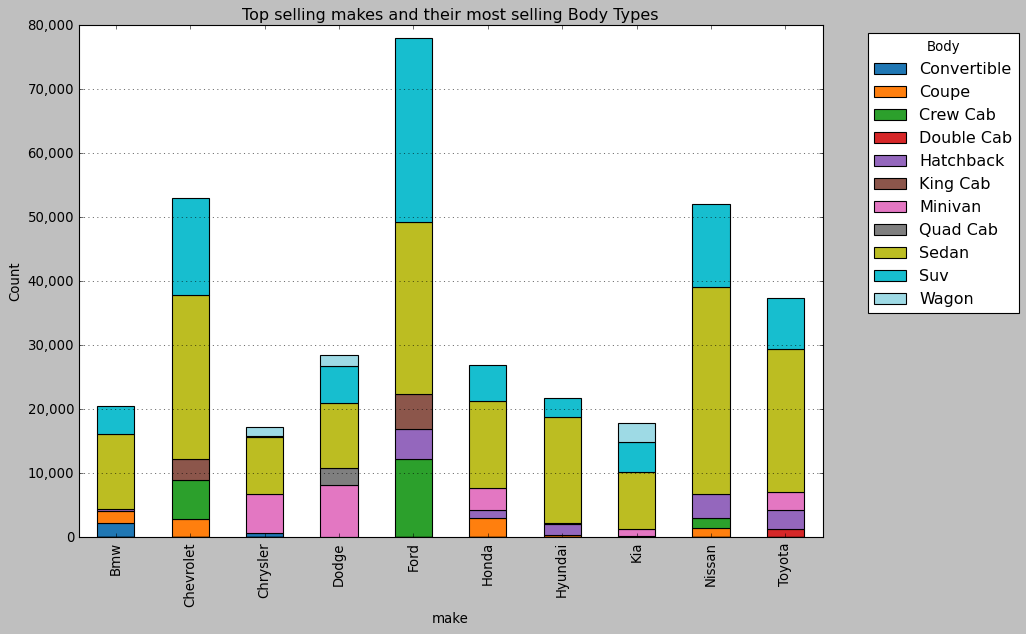

In [66]:
# Common body types from 10 popular makes
makes = df['make'].value_counts().nlargest(10).index
# select only 10 makes
make_filter = df[df['make'].isin(makes)]
make_body = make_filter.groupby(['make','body']).size().reset_index(name='count')

topBodies = (make_body.sort_values(['make', 'count'], ascending=[True, False]).groupby('make').head(5))
#data for the bar chart
data = topBodies.pivot(index='make',columns='body',values='count').fillna(0)
#plotting
plt.figure(figsize=(12,8))
data.plot(kind='bar',stacked=True,figsize=(12,8),colormap='tab20',ax=plt.gca())
#comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
#labels
plt.legend(title="Body", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top selling makes and their most selling Body Types')
plt.ylabel('Count')
plt.grid(axis='y')

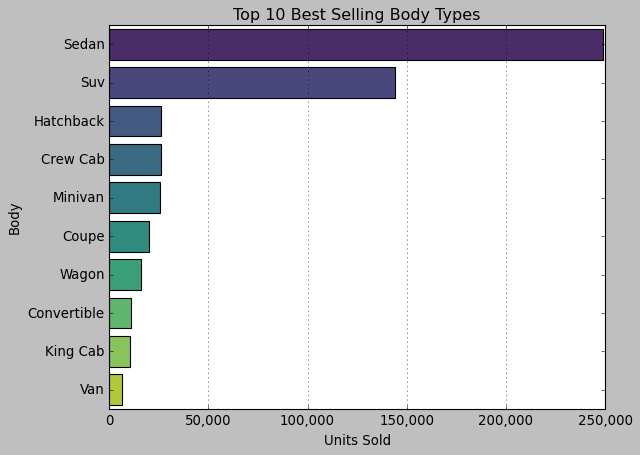

In [67]:
#Top 10 best selling make
top_10_makes = df['body'].value_counts().nlargest(10).index
#filtering the dataframe to include only top 20
filterd = df[df['body'].isin(top_10_makes)]

sns.countplot(y='body',data=filterd,order=top_10_makes,palette="viridis")
# Format the x-axis with commas
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.style.use('classic')
#labels
plt.title("Top 10 Best Selling Body Types")
plt.xlabel("Units Sold")
plt.ylabel("Body")
plt.grid(axis='x')

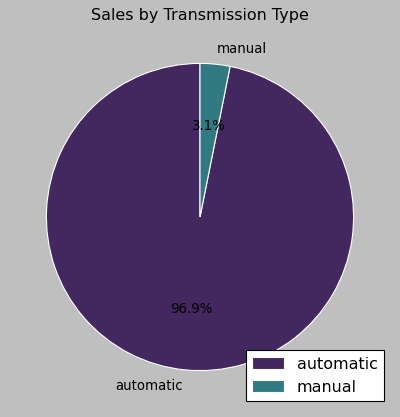

In [68]:
#best selling transmission type
#count for each transmission type
count= df["transmission"].value_counts()
colors = ['#43285f','#327a81']
plt.figure(figsize=(8,6))
plt.pie(count,labels=count.index,
       startangle=90,
        wedgeprops={'linewidth':'1','edgecolor':'white'}, #enable customising the lines dividing the chart
       colors=colors,
       autopct='%1.1f%%')#show the percentage of values as percentage with 1d.p
plt.legend(loc='lower right')
plt.title("Sales by Transmission Type")
plt.show()

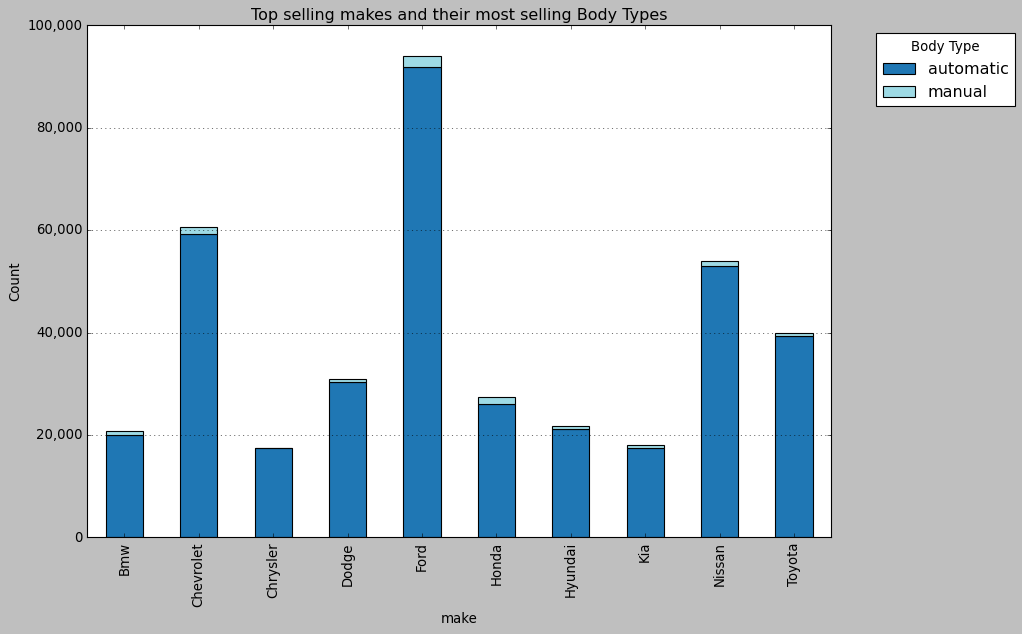

In [69]:
# Common body types from 10 popular makes
makes = df['make'].value_counts().nlargest(10).index
# select only 10 makes
make_filter = df[df['make'].isin(makes)]
make_body = make_filter.groupby(['make','transmission']).size().reset_index(name='count')

topBodies = (make_body.sort_values(['make', 'count'], ascending=[True, False]).groupby('make').head(5))
#data for the bar chart
data = topBodies.pivot(index='make',columns='transmission',values='count').fillna(0)
#plotting
plt.figure(figsize=(12,8))
data.plot(kind='bar',stacked=True,figsize=(12,8),colormap='tab20',ax=plt.gca())
#comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
#labels
plt.legend(title="Body Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top selling makes and their most selling Body Types')
plt.ylabel('Count')
plt.grid(axis='y')

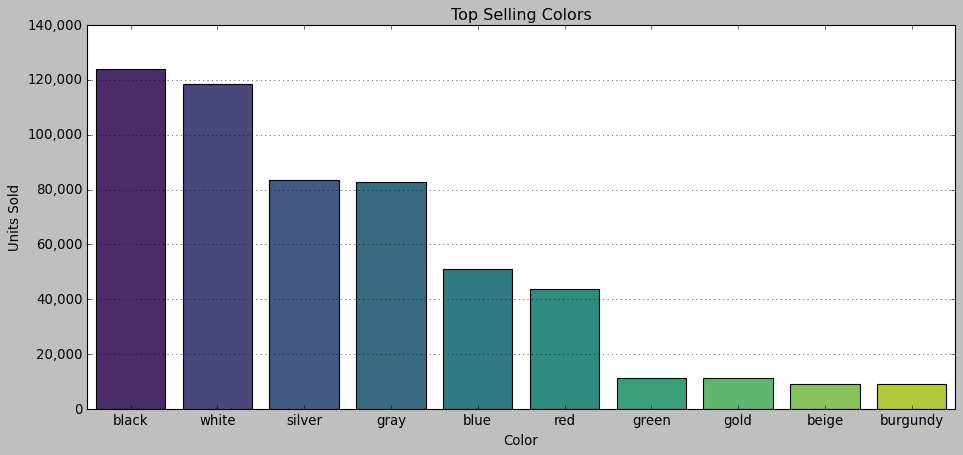

In [150]:
# Get the top 10 best-selling colors
top_selling_colors = df['color'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 colors
filtered = df[df['color'].isin(top_selling_colors)]
# Plot for top-selling colors
plt.figure(figsize=(14, 6))  # Adjust width and height as desired
sns.countplot(x='color', data=filtered, order=top_selling_colors, palette="viridis")
plt.style.use('classic')
# Labels and Title
plt.title("Top Selling Colors")
plt.xlabel("Color")
plt.ylabel("Units Sold")
# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.grid(axis='y')

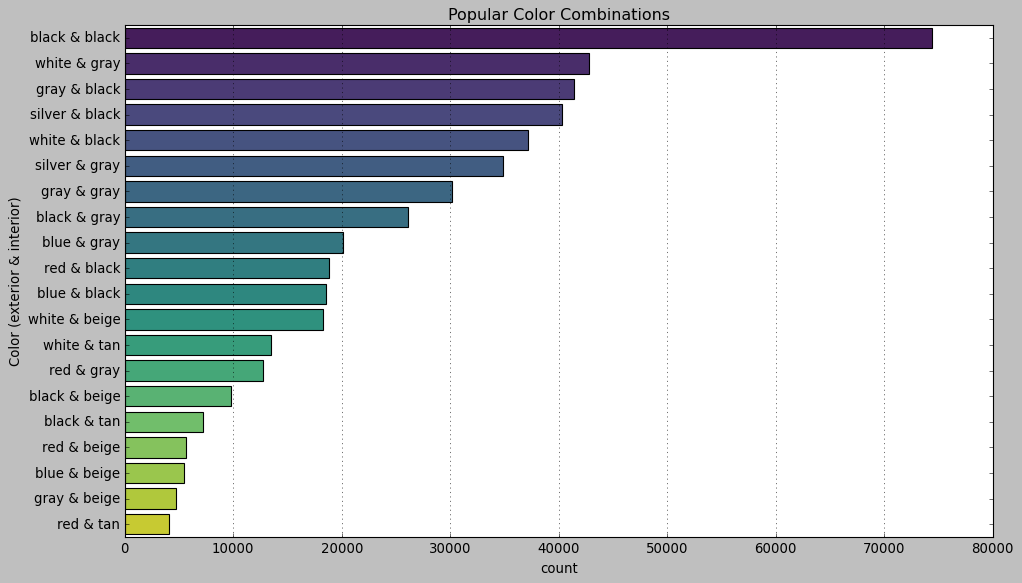

In [148]:
#best selling color combinations
combination = df.groupby(['color','interior']).size().reset_index(name='count')
#sortng the combinations by count
combination = combination.sort_values(by='count',ascending=False)
#show 20 popular combinations
popular_comb = combination.head(20)
plt.figure(figsize=(14, 8))
sns.barplot(y=popular_comb.apply(lambda x: f"{x['color']} & {x['interior']}", axis=1),x=popular_comb['count'],palette='viridis')
#labels
plt.title("Popular Color Combinations")
plt.ylabel('Color (exterior & interior)')
plt.grid(axis='x')

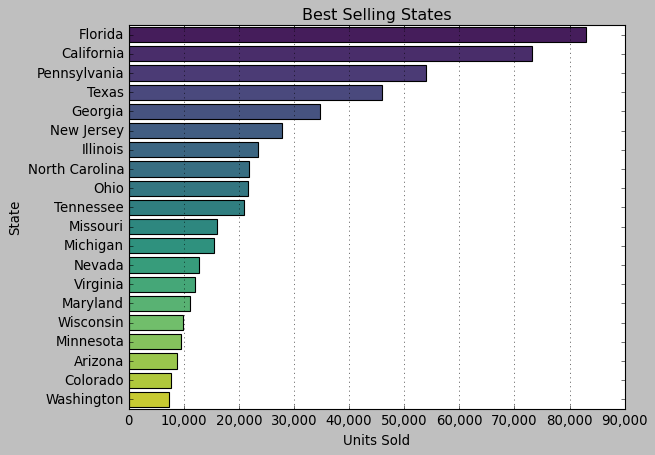

In [72]:
#best selling states
top_selling_states = df['state'].value_counts().nlargest(20).index
#filtering to include only top 10 colors
filterd = df[df['state'].isin(top_selling_states)]
sns.countplot(y='state',data=filterd,order=top_selling_states,palette="viridis")
# Format the x-axis with commas
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
#labels
plt.title("Best Selling States")
plt.ylabel('State')
plt.xlabel('Units Sold')
plt.grid(axis='x')

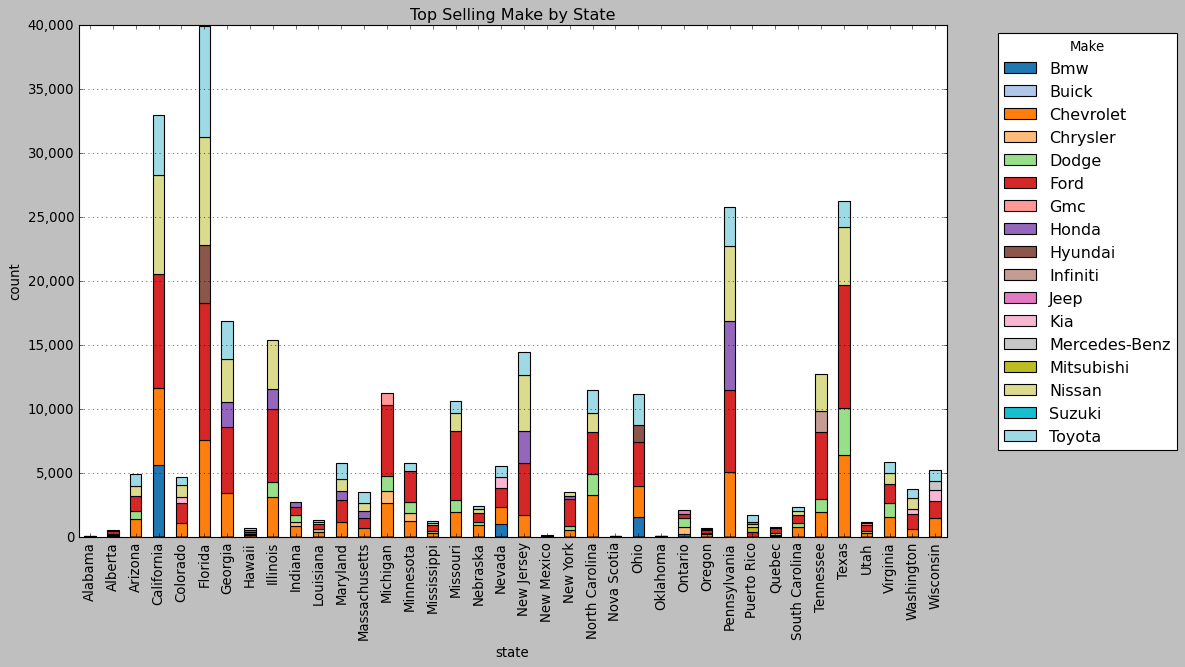

In [73]:
#best selling makes by region
regionalSales = df.groupby(['state', 'make']).size().reset_index(name='count')
#only 5 bestselling body types
body = (regionalSales.sort_values(['state', 'count'], ascending=[True, False]).groupby('state').head(5))
pivot_data = body.pivot(index='state', columns='make', values='count').fillna(0)

plt.figure(figsize=(14,8))
#stacked bar chart
pivot_data.plot(kind='bar',stacked = True,figsize=(14,8),ax= plt.gca(),colormap= 'tab20')
# Format the yaxis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
#labels
plt.title("Top Selling Make by State")
plt.xlabel('state')
plt.ylabel('count')
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

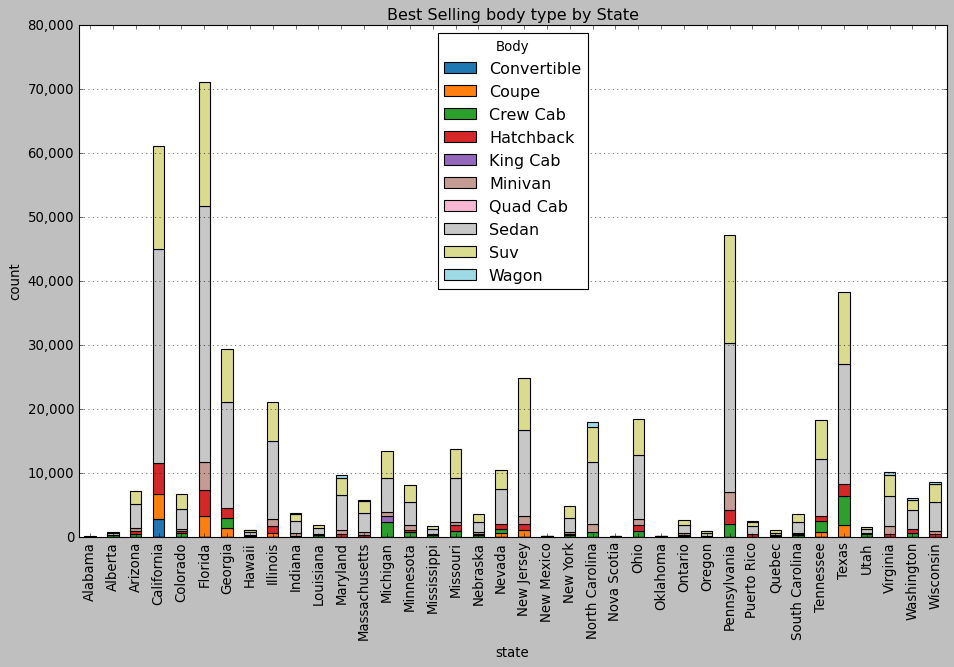

In [74]:
#sales grouped by region and body type
regionalSales = df.groupby(['state', 'body']).size().reset_index(name='count')
#only 5 bestselling body types
body = (regionalSales.sort_values(['state', 'count'], ascending=[True, False]).groupby('state').head(5))
pivot_data = body.pivot(index='state', columns='body', values='count').fillna(0)

plt.figure(figsize=(14,8))
#stacked bar chart
pivot_data.plot(kind='bar',stacked = True,figsize=(14,8),ax= plt.gca(),colormap= 'tab20')
# Format the yaxis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.title("Best Selling body type by State")
plt.xlabel('state')
plt.ylabel('count')
plt.legend(title='Body',loc='upper center')
plt.grid(axis='y')

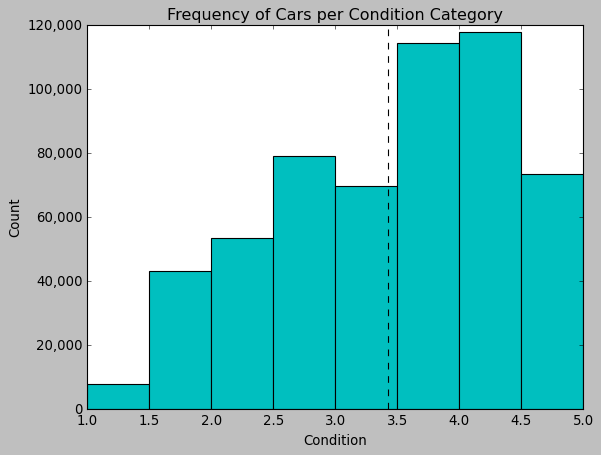

<Figure size 1120x480 with 0 Axes>

In [75]:
# histogram showing the distribution cars across various conditions
plt.title("Frequency of Cars per Condition Category")
plt.hist(df['condition'],bins=8,edgecolor='k',color='c')
#calculate average condition
mean = statistics.mean(df['condition'])
#show mean on the graph
plt.axvline(mean,color='k',linestyle='dashed')
# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Condition")
plt.ylabel("Count")
plt.figure(figsize=(14, 6))
plt.show()

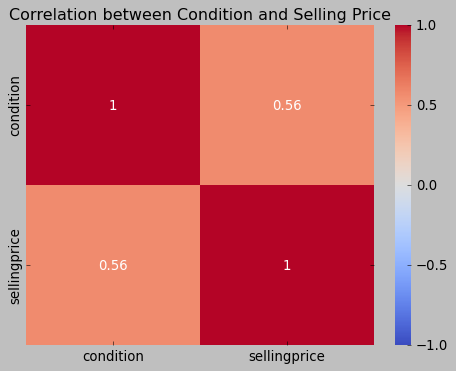

In [76]:
# Compute the correlation between 'condition' and 'sellingprice'
corr_matrix = df[['condition', 'sellingprice']].corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Condition and Selling Price")
plt.show()


The above result shows that there is moderate positive correlation between condition and selling price

#### Sales by region and best selling body type

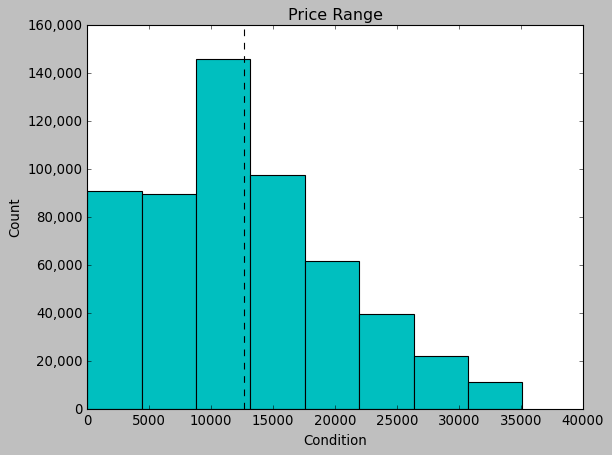

<Figure size 1120x480 with 0 Axes>

In [79]:
# histogram showing the distribution cars across various conditions
plt.title("Price Range")
plt.hist(df['sellingprice'],bins=8,edgecolor='k',color='c')
#calculate average condition
mean = statistics.mean(df['sellingprice'])
#show mean on the graph
plt.axvline(mean,color='k',linestyle='dashed')
# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Condition")
plt.ylabel("Count")
plt.figure(figsize=(14, 6))
plt.tight_layout()
#plt.show()

<Axes: title={'center': 'EV Sales Over Years'}, xlabel='year'>

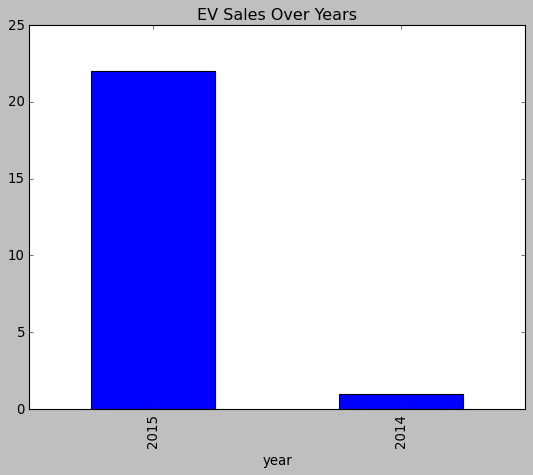

In [80]:
# Filter for EVs
ev_sales = df[df['make'].str.contains('Tesla', case=False, na=False)]
ev_sales['year'].value_counts().plot(kind='bar', title='EV Sales Over Years')

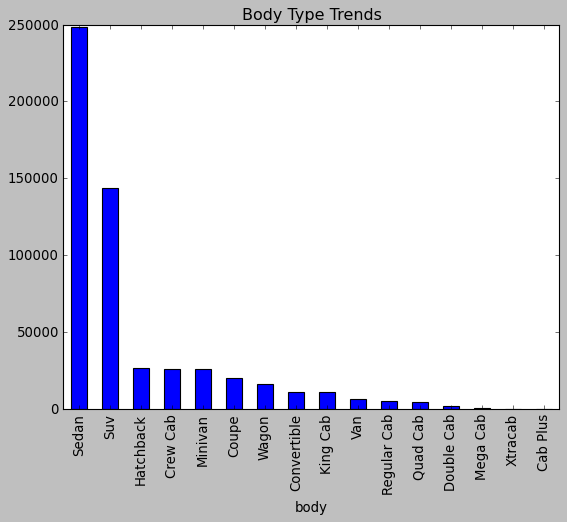

In [81]:
# Body type analysis
body_type_trends = df['body'].value_counts()
body_type_trends.plot(kind='bar', title='Body Type Trends')
plt.show()

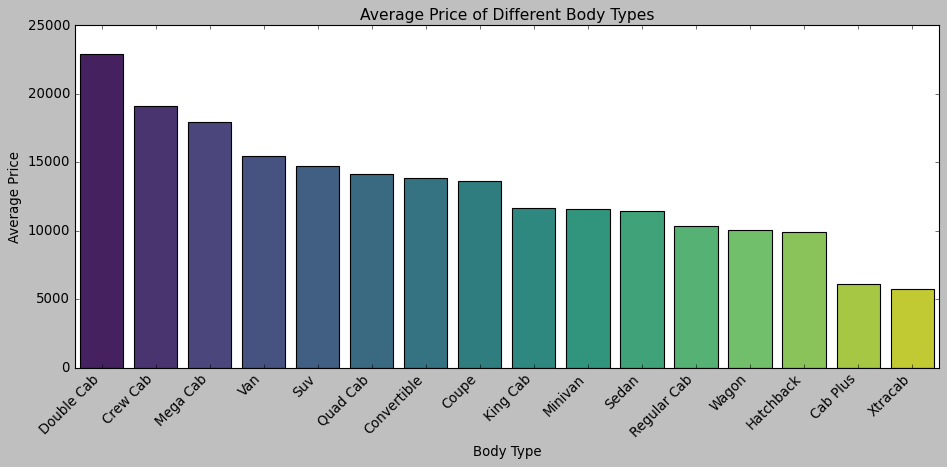

In [83]:
# Grouping by body type and calculating the average price
avg_price_by_body = df.groupby('body')['sellingprice'].mean().reset_index()

# Sorting by average price
avg_price_by_body = avg_price_by_body.sort_values(by='sellingprice', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_body,x='body',y='sellingprice',palette='viridis')
# Adding labels and title
plt.title("Average Price of Different Body Types", fontsize=14)
plt.xlabel("Body Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.show()

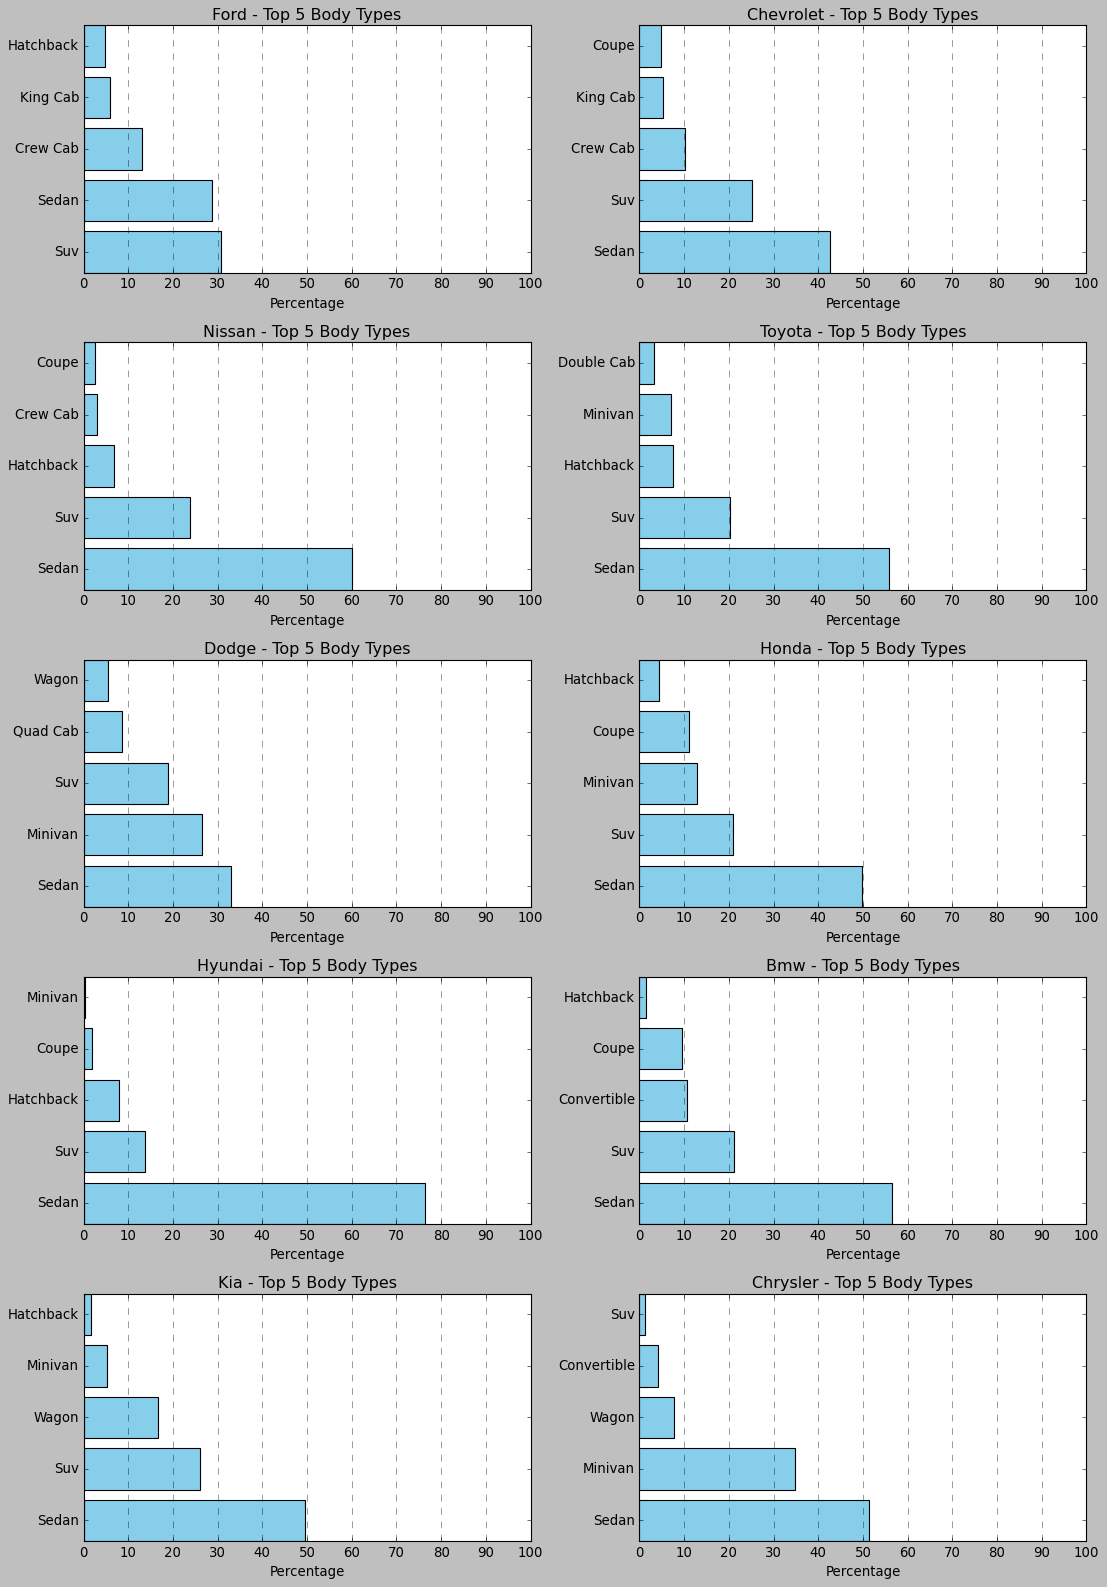

In [92]:
# Step 1: Identify the top 10 best-selling makes
top_makes = df['make'].value_counts().head(10).index

# Step 2: Filter the data for the top 10 makes
df_top_makes = df[df['make'].isin(top_makes)]

# Step 3: Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # 5 rows, 2 columns for 10 subplots
axes = axes.flatten()

# Step 4: Loop through the top makes and plot their body types
for i, make in enumerate(top_makes):
    make_data = df_top_makes[df_top_makes['make'] == make]
    body_type_counts = make_data['body'].value_counts(normalize=True).head(5) * 100  # Percentage
    
    # Plot
    axes[i].barh(body_type_counts.index, body_type_counts.values, color='skyblue')
    axes[i].set_title(f"{make} - Top 5 Body Types")
    axes[i].set_xlabel('Percentage')
    axes[i].set_xlim(0, 100)  # Percentages range from 0 to 100
    axes[i].set_xticks(range(0, 101, 10))
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

# Step 5: Adjust layout
plt.tight_layout()
plt.show()